# Mini GeoSpatial Project

(Data Title)

In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [35]:
district_maps = gpd.read_file('../data/council_district_outlines.geojson')
print(district_maps.crs)
district_maps.head(30)

epsg:4326


,first_name,email_address,business_phone_number,last_name,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."
5,Brett A.,Brett.Withers@nashville.gov,615-432-1306,Withers,6,"MULTIPOLYGON (((-86.69743 36.20060, -86.69761 ..."
6,Emily,Emily.Benedict@nashville.gov,615-432-1307,Benedict,7,"MULTIPOLYGON (((-86.71024 36.25584, -86.70973 ..."
7,Nancy,Nancy.VanReece@nashville.gov,615-432-1308,VanReece,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ..."
8,Tonya,Tonya.Hancock@nashville.gov,615-432-1309,Hancock,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
9,Zach,Zachary.Young@nashville.gov,615-432-1310,Young,10,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."


In [36]:
type(district_maps)

geopandas.geodataframe.GeoDataFrame

In [43]:
district_maps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   first_name             35 non-null     object  
 1   email_address          35 non-null     object  
 2   business_phone_number  35 non-null     object  
 3   last_name              35 non-null     object  
 4   council_district       35 non-null     object  
 5   geometry               35 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 1.8+ KB


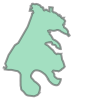

In [37]:
district_maps.loc[0, 'geometry']

<AxesSubplot:>

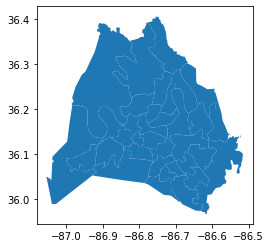

In [38]:
district_maps.plot()

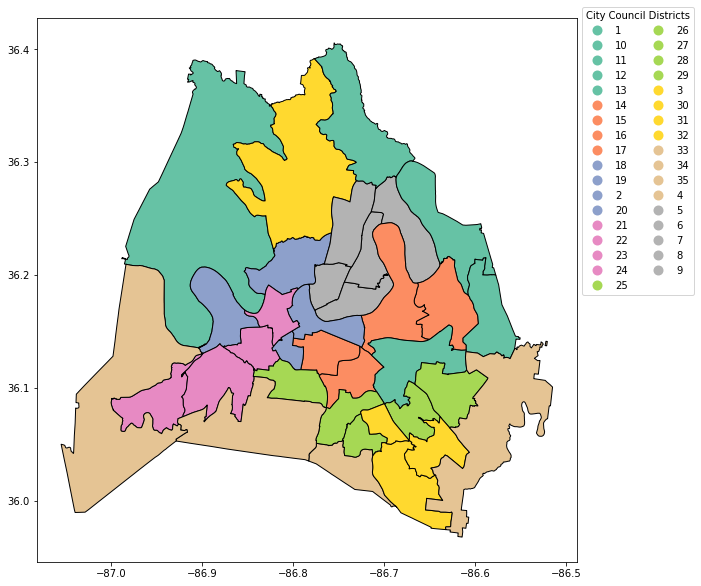

In [41]:
leg_kwds = {'title': 'City Council Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}
district_maps.plot(column = 'council_district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [44]:
art_spots = pd.read_csv('../data/art_in_public_places.csv')
print(art_spots.shape)
art_spots.head()

(164, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"
3,Blowing Bubbles,Faxon,Russell,"4715 Harding Pike, Nashville TN",Bronze,Sculpture,NaN,36.11975,-86.85343,"(36.11975, -86.85343)"
4,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,"(36.16489, -86.78184)"


In [45]:
art_spots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              164 non-null    object 
 1   Artist Last Name   164 non-null    object 
 2   Artist First Name  159 non-null    object 
 3   Location           164 non-null    object 
 4   Medium             162 non-null    object 
 5   Type               164 non-null    object 
 6   Description        107 non-null    object 
 7   Latitude           162 non-null    float64
 8   Longitude          162 non-null    float64
 9   Mapped Location    162 non-null    object 
dtypes: float64(2), object(8)
memory usage: 12.9+ KB


In [48]:
art_spots['geometry'] = art_spots.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
art_spots.head(3)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491000000001 36.1624)
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594000000001 36.15961)


In [50]:
district_maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich